In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.patches import Polygon

In [2]:
file = pd.read_excel ('SFEW.xlsx')
file.columns = ['name', 'target', 'value_1', 'value_2', 'value_3', 'value_4', 'value_5', 'value_6', 'value_7', 'value_8', 'value_9', 'value_10']

In [3]:
file

,name,target,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,value_10
0,Airheads_000519240_00000005.mat,1,-0.000817,0.003470,-0.007517,-0.010912,-0.005430,0.009551,0.006776,0.003519,-0.001000,0.004308
1,AlexEmma_000225840_00000024.mat,1,-0.001982,-0.000265,0.000161,-0.010747,0.000829,-0.000496,-0.004723,-0.005301,0.000029,0.002434
2,AlexEmma_000846120_00000015.mat,1,-0.003012,0.013759,-0.008705,0.001943,0.006113,0.012350,-0.004481,-0.000069,0.002239,0.006395
3,AlexEmma_000958320_00000022.mat,1,0.000224,0.004894,-0.005484,-0.004426,-0.009883,-0.001278,-0.003075,-0.002220,0.000155,0.000375
4,AlexEmma_000958320_00000048.mat,1,-0.000442,-0.002376,-0.002423,-0.010372,0.002108,0.000928,0.000823,-0.003169,-0.003913,0.005152
...,...,...,...,...,...,...,...,...,...,...,...,...
670,ThereIsSomethingAboutMary_005941880_00000024.mat,7,-0.003180,-0.011447,-0.005621,-0.000347,-0.001719,0.007503,0.003418,0.008626,-0.004456,-0.001137
671,ThereIsSomethingAboutMary_005941880_00000039.mat,7,-0.005064,-0.017186,-0.019024,0.009517,0.006312,-0.002824,-0.001933,-0.006488,-0.010634,-0.008775
672,ThereIsSomethingAboutMary_013959520_00000021.mat,7,-0.003414,-0.009267,0.015782,0.005325,0.005841,-0.005681,-0.007826,-0.007428,-0.001486,0.001419
673,YouveGotAMail_000426174_00000017.mat,7,-0.001855,-0.011636,-0.000118,0.002905,0.001023,0.001725,0.007269,0.006552,0.001936,-0.005089


In [4]:
class_distribution = file.groupby('target')['name'].count()

In [5]:
class_distribution = pd.DataFrame(class_distribution)
class_distribution = class_distribution.reset_index()

In [6]:
class_distribution

,target,name
0,1,100
1,2,75
2,3,100
3,4,100
4,5,100
5,6,100
6,7,100


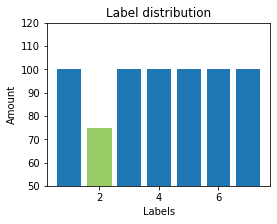

In [13]:
plt.figure(figsize=(4, 3))
plt.xlabel('Labels', fontsize=10)
plt.ylabel('Amount', fontsize=10)
plt.title('Label distribution', fontsize=12)
# plt.legend(labels='Label amount', fontsize=8)
plt.ylim(50, 120)
barlist = plt.bar(class_distribution['target'], class_distribution['name'])
barlist[1].set_color('#99CC66')
# plt.show()
plt.savefig('Labels.png')

In [28]:
print(class_distribution.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  target &  name \\
\midrule
0 &       1 &   100 \\
1 &       2 &    75 \\
2 &       3 &   100 \\
3 &       4 &   100 \\
4 &       5 &   100 \\
5 &       6 &   100 \\
6 &       7 &   100 \\
\bottomrule
\end{tabular}



In [8]:
features = file.iloc[:, 2:]

In [9]:
print('The max value within each feature: \n' + str(features.max())[:-14] + '\n' +
     'The min value within each feature: \n' + str(features.min())[:-14] + '\n' + 
     'The mean value within each feature: \n' + str(features.mean())[:-14] + '\n')

The max value within each feature: 
value_1     0.994010
value_2     0.054775
value_3     0.062508
value_4     0.035697
value_5     0.017389
value_6     0.015622
value_7     0.017791
value_8     0.013952
value_9     0.020399
value_10    0.016130

The min value within each feature: 
value_1    -0.009394
value_2    -0.043786
value_3    -0.035967
value_4    -0.021130
value_5    -0.017691
value_6    -0.019926
value_7    -0.014276
value_8    -0.015021
value_9    -0.015855
value_10   -0.011857

The mean value within each feature: 
value_1    -3.111111e-09
value_2    -3.525926e-09
value_3    -5.940741e-09
value_4    -3.555556e-10
value_5     4.977778e-09
value_6     6.676558e-10
value_7    -1.839763e-09
value_8     1.038576e-09
value_9     4.243323e-09
value_10   -3.709199e-09




In [24]:
features.describe()

,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,value_10
count,6.750000e+02,6.750000e+02,6.750000e+02,6.750000e+02,6.750000e+02,6.740000e+02,6.740000e+02,6.740000e+02,6.740000e+02,6.740000e+02
mean,-3.111111e-09,-3.525926e-09,-5.940741e-09,-3.555556e-10,4.977778e-09,6.676558e-10,-1.839763e-09,1.038576e-09,4.243323e-09,-3.709199e-09
std,3.982583e-02,1.594260e-02,1.066343e-02,7.918249e-03,5.979569e-03,7.062467e-03,6.493357e-03,5.111828e-03,4.738708e-03,4.681640e-03
min,-9.394000e-03,-4.378600e-02,-3.596700e-02,-2.113000e-02,-1.769100e-02,-1.992600e-02,-1.427600e-02,-1.502100e-02,-1.585500e-02,-1.185700e-02
25%,-3.993150e-03,-1.119900e-02,-6.743050e-03,-5.568200e-03,-4.229000e-03,-5.323100e-03,-4.799950e-03,-3.573025e-03,-2.827050e-03,-3.113250e-03
50%,-2.516900e-03,-2.179900e-03,-3.701400e-04,-4.167200e-04,-1.857000e-04,3.868050e-04,-1.641550e-04,2.360000e-04,1.380850e-04,-1.621050e-04
75%,-1.132750e-03,9.206350e-03,4.979700e-03,5.008900e-03,4.028800e-03,5.712225e-03,4.724075e-03,3.645725e-03,2.734750e-03,2.717700e-03
max,9.940100e-01,5.477500e-02,6.250800e-02,3.569700e-02,1.738900e-02,1.562200e-02,1.779100e-02,1.395200e-02,2.039900e-02,1.613000e-02


In [26]:
print(features.iloc[:, 5:].describe().to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &       value\_6 &       value\_7 &       value\_8 &       value\_9 &      value\_10 \\
\midrule
count &  6.740000e+02 &  6.740000e+02 &  6.740000e+02 &  6.740000e+02 &  6.740000e+02 \\
mean  &  6.676558e-10 & -1.839763e-09 &  1.038576e-09 &  4.243323e-09 & -3.709199e-09 \\
std   &  7.062467e-03 &  6.493357e-03 &  5.111828e-03 &  4.738708e-03 &  4.681640e-03 \\
min   & -1.992600e-02 & -1.427600e-02 & -1.502100e-02 & -1.585500e-02 & -1.185700e-02 \\
25\%   & -5.323100e-03 & -4.799950e-03 & -3.573025e-03 & -2.827050e-03 & -3.113250e-03 \\
50\%   &  3.868050e-04 & -1.641550e-04 &  2.360000e-04 &  1.380850e-04 & -1.621050e-04 \\
75\%   &  5.712225e-03 &  4.724075e-03 &  3.645725e-03 &  2.734750e-03 &  2.717700e-03 \\
max   &  1.562200e-02 &  1.779100e-02 &  1.395200e-02 &  2.039900e-02 &  1.613000e-02 \\
\bottomrule
\end{tabular}

